In [ ]:
import pandas as pd
import os
import seaborn
import matplotlib_inline
import plotly

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bts_station.csv to bts_station.csv
Saving MRT 64 monthly traffic.csv to MRT 64 monthly traffic.csv
Saving MRT usage stats.csv to MRT usage stats.csv
Saving mrt_station.csv to mrt_station.csv
Saving Number of users of Bangkoks electric train (BTS).csv to Number of users of Bangkoks electric train (BTS).csv
Saving Travel statistics on the transportation network, 2019-2025.csv to Travel statistics on the transportation network, 2019-2025.csv


In [ ]:
MRT_traff = pd.read_csv('MRT 64 monthly traffic.csv')
BTS = pd.read_csv('Number of users of Bangkoks electric train (BTS).csv')
MRT_Stats = pd.read_csv('MRT usage stats.csv')
stats = pd.read_csv('Travel statistics on the transportation network, 2019-2025.csv')

In [ ]:

BTS.loc[BTS.index[-1], 'm_month'] = 'Jul 2023'


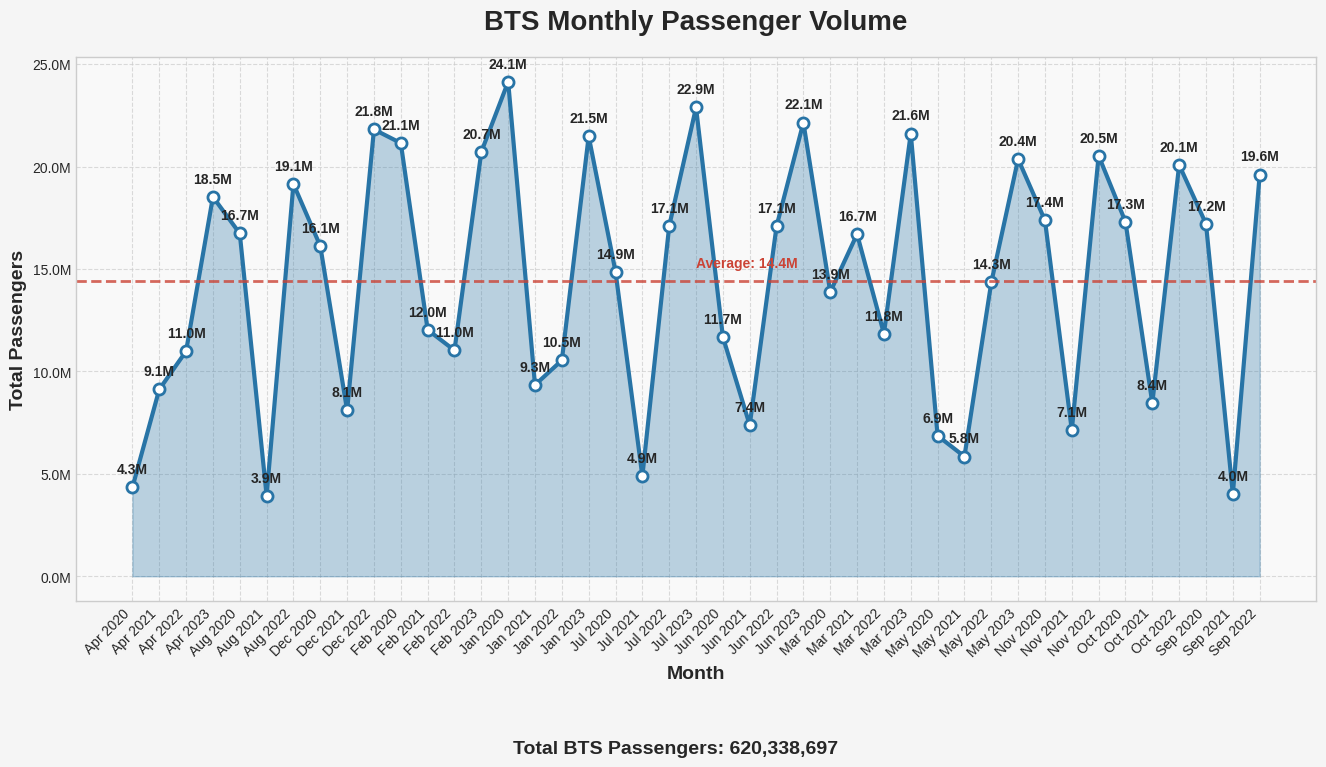

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Group by month and sum the number of passengers
monthly_traffic = BTS.groupby('m_month')['t_total'].sum()

# Create a figure with a specific style
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(16, 8))

# Create a visually appealing line plot with customizations
months = monthly_traffic.index
values = monthly_traffic.values

# Plot with enhanced styling
ax.plot(months, values, marker='o', markersize=8, linewidth=3,
        color='#2874A6', markerfacecolor='white', markeredgewidth=2)

# Fill area under the curve
ax.fill_between(months, values, alpha=0.3, color='#2874A6')

# Add data labels
for i, val in enumerate(values):
    ax.annotate(f'{val/1000000:.1f}M',
                xy=(months[i], values[i]),
                xytext=(0, 10),
                textcoords='offset points',
                ha='center',
                fontweight='bold')

# Enhance the axes and labels
ax.set_xlabel('Month', fontsize=14, fontweight='bold')
ax.set_ylabel('Total Passengers', fontsize=14, fontweight='bold')

# Format y-axis to show millions
def millions(x, pos):
    return f'{x/1000000:.1f}M'
ax.yaxis.set_major_formatter(FuncFormatter(millions))

# Set title with styling
ax.set_title('BTS Monthly Passenger Volume', fontsize=20, fontweight='bold', pad=20)

# Style the grid
ax.grid(True, linestyle='--', alpha=0.7)

# Add a subtle background color
fig.patch.set_facecolor('#F5F5F5')
ax.set_facecolor('#F9F9F9')

# Add a horizontal average line
avg = np.mean(values)
ax.axhline(y=avg, color='#CB4335', linestyle='--', linewidth=2, alpha=0.8)
ax.annotate(f'Average: {avg/1000000:.1f}M',
            xy=(months[len(months)//2], avg),
            xytext=(0, 10),
            textcoords='offset points',
            color='#CB4335',
            fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.subplots_adjust(bottom=0.2)
total_passengers = BTS['t_total'].sum()
plt.figtext(0.5, 0.01, f"Total BTS Passengers: {total_passengers:,}",
            ha="center", fontsize=14, fontweight='bold')
plt.show()

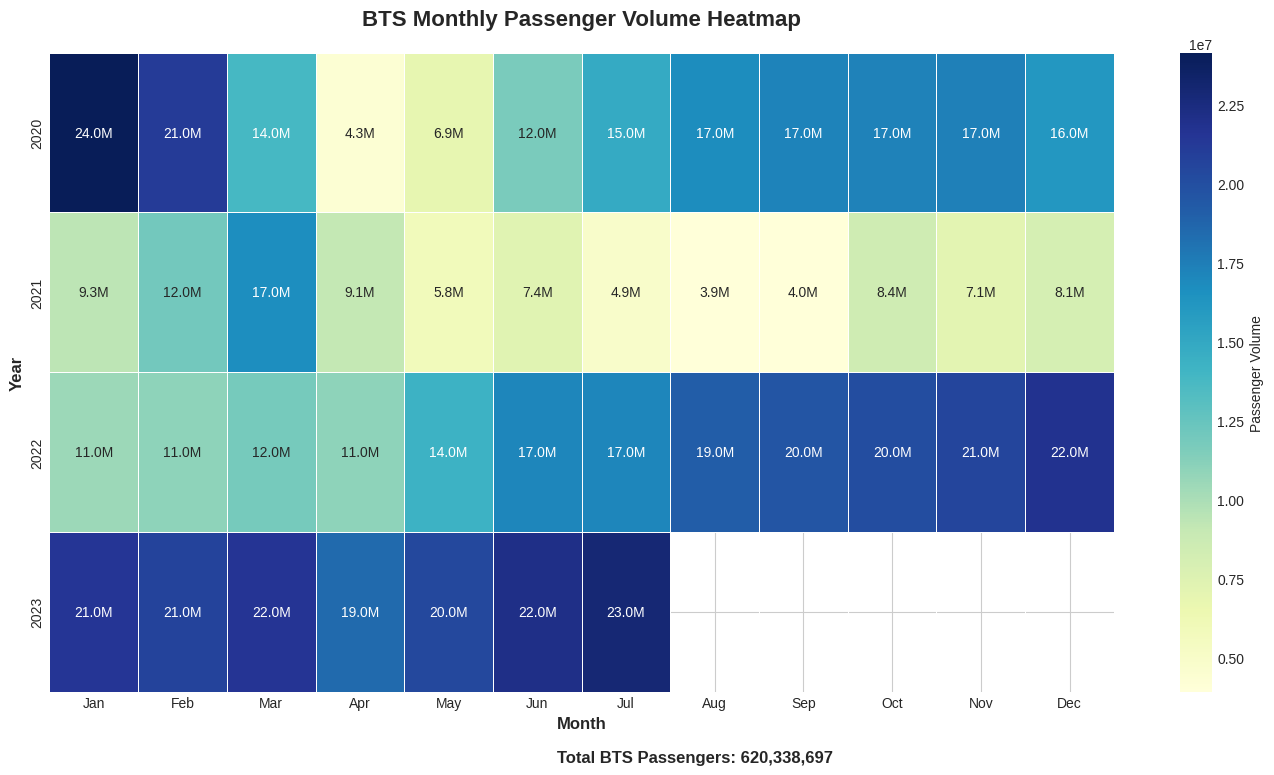

<ipython-input-6-4f20a8ff5bb2>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='coolwarm')


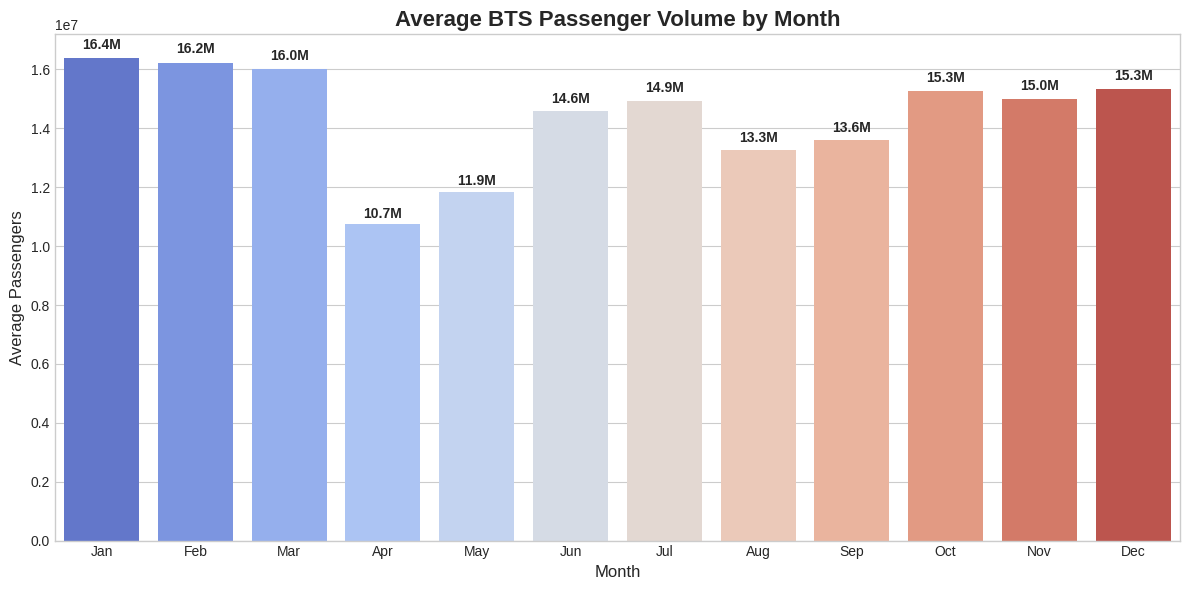

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import calendar

if pd.api.types.is_datetime64_any_dtype(BTS['m_month']):
    BTS['year'] = BTS['m_month'].dt.year
    BTS['month_num'] = BTS['m_month'].dt.month
    # Create month names for better labeling
    BTS['month_name'] = BTS['m_month'].dt.strftime('%b')
else:

    BTS['month_str'] = BTS['m_month'].astype(str)
    # Extract year and month from strings if in format like 'Jan 2020'
    BTS['year'] = BTS['month_str'].str[-4:].astype(int)
    month_dict = {m: i+1 for i, m in enumerate(calendar.month_abbr[1:])}
    BTS['month_num'] = BTS['month_str'].str[:3].map(month_dict)
    BTS['month_name'] = BTS['month_str'].str[:3]

# Group by year and month and sum passenger counts
monthly_data = BTS.groupby(['year', 'month_num', 'month_name'])['t_total'].sum().reset_index()

# Create a pivot table for the heatmap
# Rows are years, columns are months
heatmap_data = monthly_data.pivot(index='year', columns='month_num', values='t_total')

# Replace column numbers with month names for better readability
month_names = {i+1: m for i, m in enumerate(calendar.month_abbr[1:])}
heatmap_data.columns = [month_names[col] for col in heatmap_data.columns]

# Create the heatmap
plt.figure(figsize=(14, 8))
ax = sns.heatmap(heatmap_data,
                 cmap='YlGnBu',
                 annot=True,
                 fmt='.1e',  # Scientific notation
                 linewidths=.5,
                 cbar_kws={'label': 'Passenger Volume'})

# Customize the formatting of annotation values (in millions)
for t in ax.texts:
    # Convert scientific notation to millions format
    value = float(t.get_text())
    t.set_text(f'{value/1e6:.1f}M')

# Customize the plot
plt.title('BTS Monthly Passenger Volume Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Year', fontsize=12, fontweight='bold')

# Calculate and display total passengers
total_passengers = BTS['t_total'].sum()
plt.figtext(0.5, 0.01, f"Total BTS Passengers: {total_passengers:,}",
            ha="center", fontsize=12, fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Make room for title and total passenger text
plt.show()

# Additional visualization: Monthly averages across years
plt.figure(figsize=(12, 6))
monthly_avg = monthly_data.groupby('month_name')['t_total'].mean().reindex(
    [calendar.month_abbr[i] for i in range(1, 13)])
ax = sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='coolwarm')

# Add value labels on top of bars
for i, v in enumerate(monthly_avg.values):
    ax.text(i, v + v*0.02, f'{v/1e6:.1f}M', ha='center', fontweight='bold')

plt.title('Average BTS Passenger Volume by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Passengers', fontsize=12)
plt.tight_layout()
plt.show()

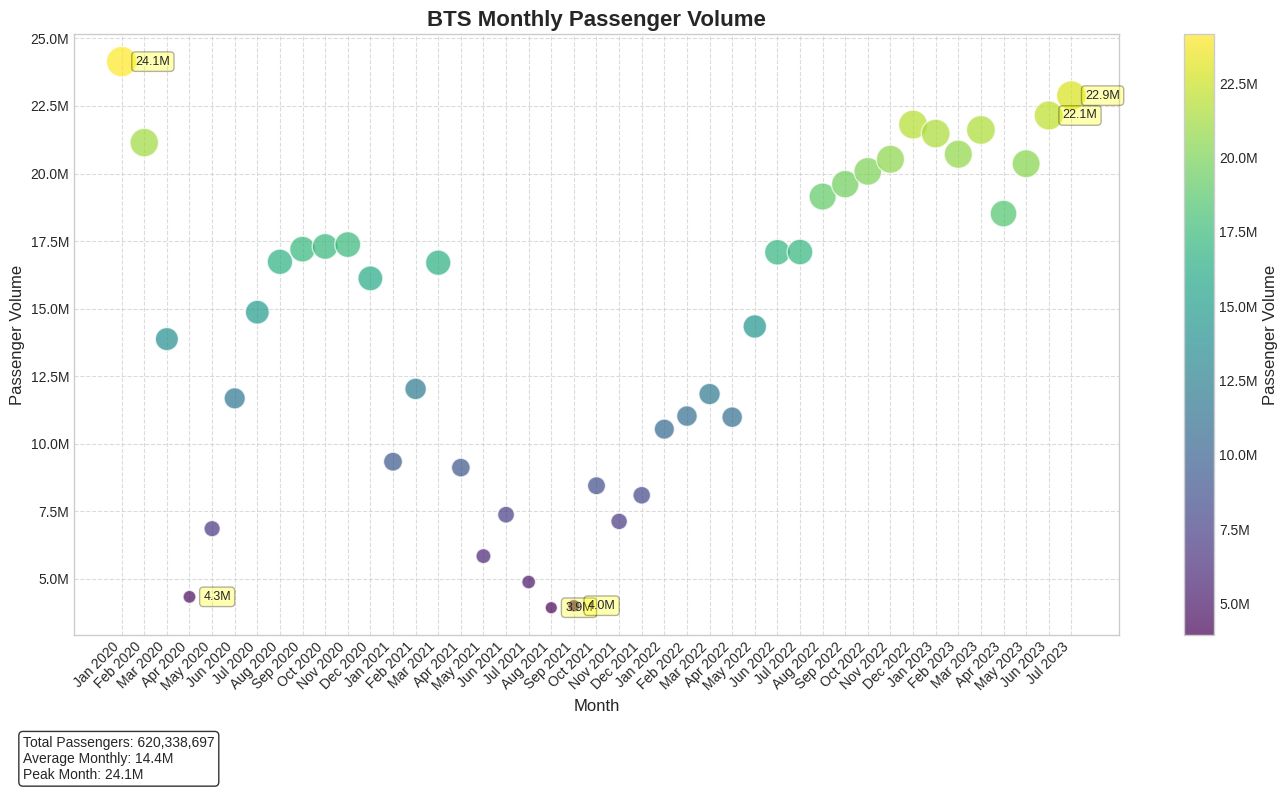

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates

# Create figure and axis
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)

# Create scatter plot with sized points based on volume
scatter = plt.scatter(BTS['m_month'],
                     BTS['t_total'],
                     s=BTS['t_total']/50000,  # Size points based on passenger volume
                     alpha=0.7,
                     c=BTS['t_total'],  # Color based on passenger volume
                     cmap='viridis',
                     edgecolor='white',
                     linewidth=1)

# Add color bar to show volume scale
cbar = plt.colorbar(scatter)
cbar.set_label('Passenger Volume', fontsize=12)

# Format colorbar labels to show millions
def millions(x, pos):
    return f'{x/1000000:.1f}M'
cbar.ax.yaxis.set_major_formatter(FuncFormatter(millions))

# Add data point labels for key points
# Label top 3 and bottom 3 points
top_indices = BTS['t_total'].nlargest(3).index
bottom_indices = BTS['t_total'].nsmallest(3).index

for idx in list(top_indices) + list(bottom_indices):
    plt.annotate(f"{BTS.loc[idx, 't_total']/1000000:.1f}M",
                xy=(BTS.loc[idx, 'm_month'], BTS.loc[idx, 't_total']),
                xytext=(10, 0),
                textcoords="offset points",
                ha='left',
                va='center',
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.3))

# Format y-axis to show millions
ax.yaxis.set_major_formatter(FuncFormatter(millions))

# Format x-axis for better readability
if pd.api.types.is_datetime64_any_dtype(BTS['m_month']):
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.xticks(rotation=45, ha='right')
else:
    plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Add title and labels
plt.title('BTS Monthly Passenger Volume', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Passenger Volume', fontsize=12)

# Calculate and add stats text
total_passengers = BTS['t_total'].sum()
mean_passengers = BTS['t_total'].mean()
max_passengers = BTS['t_total'].max()
max_month = BTS.loc[BTS['t_total'].idxmax(), 'm_month']

stats_text = (
    f"Total Passengers: {total_passengers:,.0f}\n"
    f"Average Monthly: {mean_passengers/1000000:.1f}M\n"
    f"Peak Month: {max_passengers/1000000:.1f}M"
)

# Add stats box
plt.figtext(0.02, 0.02, stats_text,
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
           fontsize=10)

# Add spacing at bottom for rotated x labels
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

In [ ]:
bts_station = pd.read_csv('bts_station.csv')
MRT_station = pd.read_csv('mrt_station.csv')

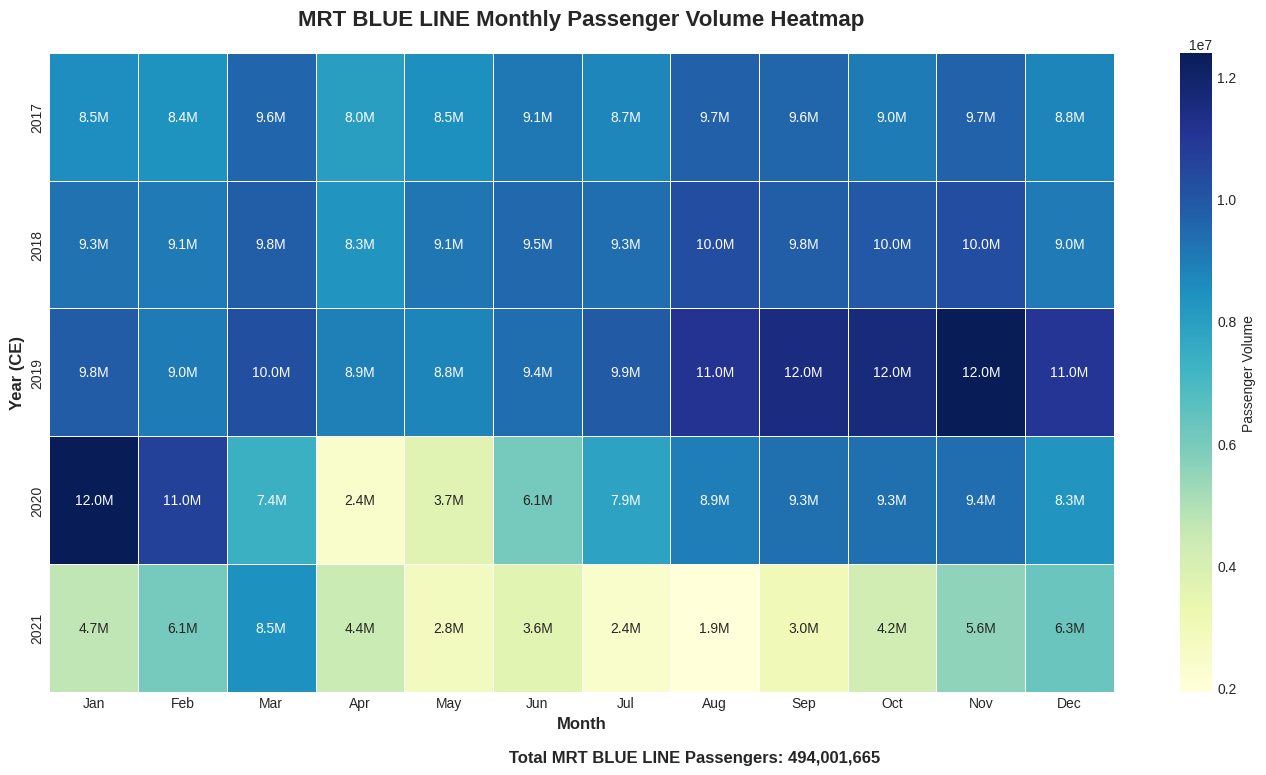

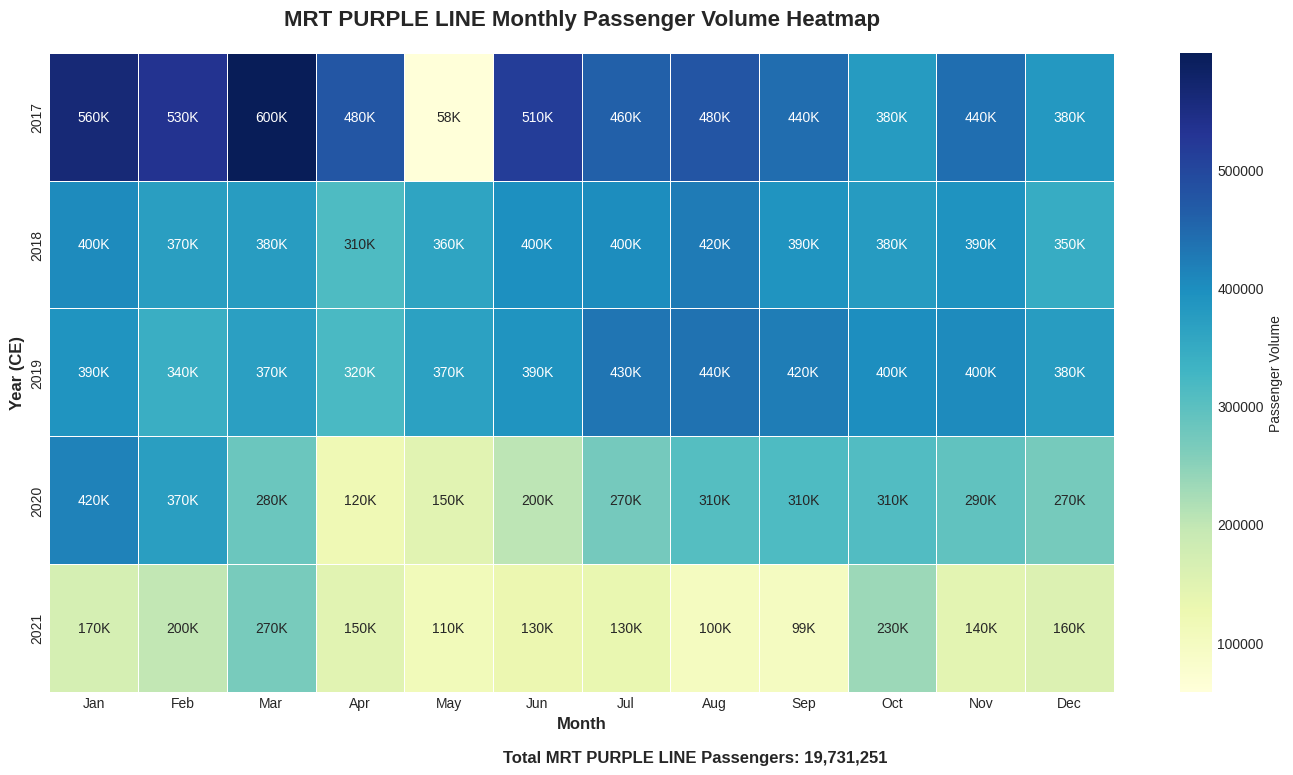

<Figure size 1400x800 with 0 Axes>

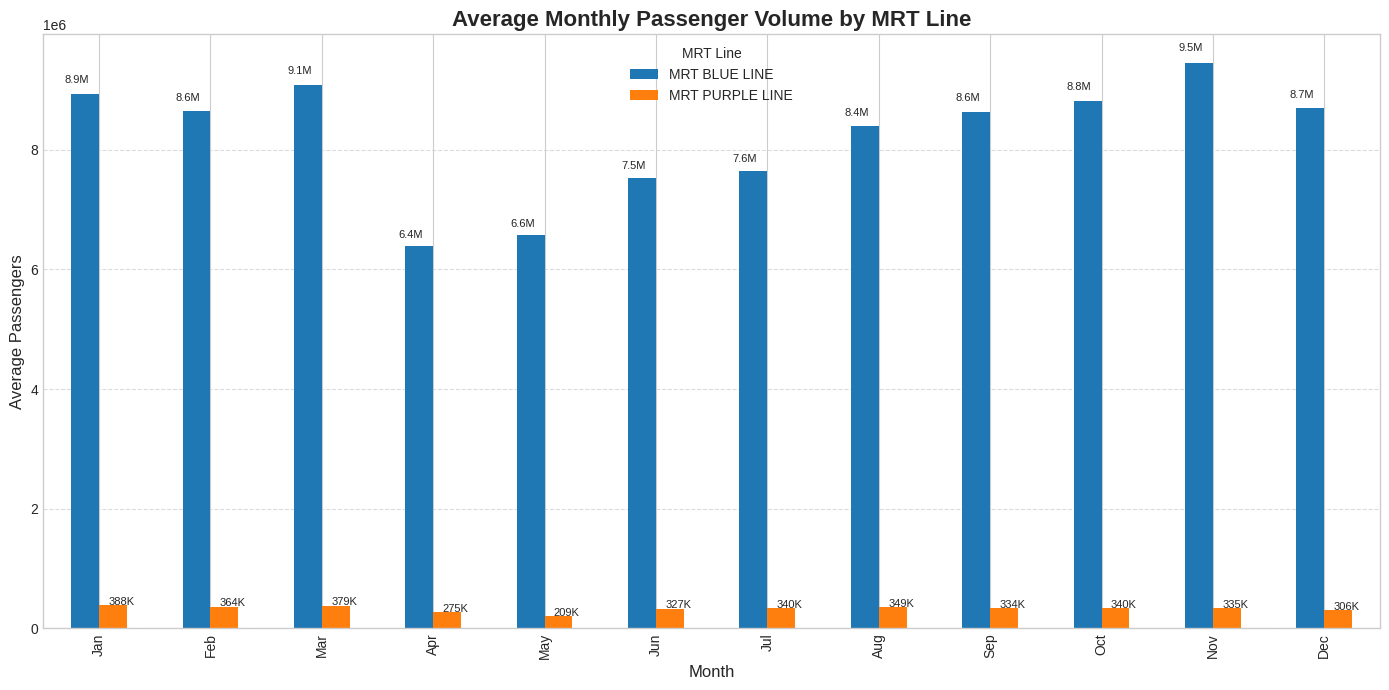

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import calendar

# Load the data and clean it
data_string = """Year,Month,Passenger,MRT,,,,
2560,Jan,"8,531,801",MRT BLUE LINE,,,,
2560,Feb,"8,397,224",MRT BLUE LINE,,,,
# ...rest of the data...
"""

# Clean the passenger column by removing commas and converting to numeric
MRT_stats = pd.read_csv('MRT usage stats.csv')
MRT_stats['Passenger'] = MRT_stats['Passenger'].str.replace(',', '').str.strip().astype(float)

# Convert Thai Buddhist calendar years
MRT_stats['Year_CE'] = MRT_stats['Year'] - 543

# Create a month number column for proper ordering
month_dict = {m: i+1 for i, m in enumerate(calendar.month_abbr[1:])}
MRT_stats['Month_num'] = MRT_stats['Month'].map(month_dict)

# Create a pivot table for the heatmap - one for each MRT line
blue_line_data = MRT_stats[MRT_stats['MRT'] == 'MRT BLUE LINE']
purple_line_data = MRT_stats[MRT_stats['MRT'] == 'MRT PURPLE LINE']

# Function to create heatmap for a specific MRT line
def create_mrt_heatmap(data, line_name):
    # Create a pivot table
    heatmap_data = data.pivot(index='Year_CE', columns='Month_num', values='Passenger')

    # Replace column numbers with month names
    month_names = {i+1: m for i, m in enumerate(calendar.month_abbr[1:])}
    heatmap_data.columns = [month_names[col] for col in heatmap_data.columns]

    # Create the heatmap
    plt.figure(figsize=(14, 8))
    ax = sns.heatmap(heatmap_data,
                    cmap='YlGnBu',
                    annot=True,
                    fmt='.1e',  # Scientific notation
                    linewidths=.5,
                    cbar_kws={'label': 'Passenger Volume'})

    # Customize the formatting of annotation values (in millions)
    for t in ax.texts:
        value = float(t.get_text())
        if value >= 1e6:
            t.set_text(f'{value/1e6:.1f}M')
        else:
            t.set_text(f'{value/1e3:.0f}K')

    # Customize the plot
    plt.title(f'{line_name} Monthly Passenger Volume Heatmap', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Month', fontsize=12, fontweight='bold')
    plt.ylabel('Year (CE)', fontsize=12, fontweight='bold')

    # Calculate and display total passengers
    total_passengers = data['Passenger'].sum()
    plt.figtext(0.5, 0.01, f"Total {line_name} Passengers: {total_passengers:,.0f}",
                ha="center", fontsize=12, fontweight='bold')

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

# Create heatmaps for each line
create_mrt_heatmap(blue_line_data, 'MRT BLUE LINE')
create_mrt_heatmap(purple_line_data, 'MRT PURPLE LINE')

# Combined monthly average visualization
plt.figure(figsize=(14, 8))

# Prepare data for monthly averages by line
monthly_avg_by_line = MRT_stats.groupby(['MRT', 'Month_num'])['Passenger'].mean().reset_index()
monthly_avg_by_line['Month_name'] = monthly_avg_by_line['Month_num'].apply(lambda x: calendar.month_abbr[x])

# Create a pivot table for easier plotting
monthly_pivot = monthly_avg_by_line.pivot(index='Month_name', columns='MRT', values='Passenger')

# Reindex to ensure correct month order
monthly_pivot = monthly_pivot.reindex([calendar.month_abbr[i] for i in range(1, 13)])

# Plot as a grouped bar chart
monthly_pivot.plot(kind='bar', figsize=(14, 7))
plt.title('Average Monthly Passenger Volume by MRT Line', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Passengers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='MRT Line')

# Add annotations for the blue line
for i, v in enumerate(monthly_pivot['MRT BLUE LINE']):
    if not np.isnan(v):
        if v >= 1e6:
            plt.text(i-0.2, v + v*0.02, f'{v/1e6:.1f}M', ha='center', fontsize=8)
        else:
            plt.text(i-0.2, v + v*0.02, f'{v/1e3:.0f}K', ha='center', fontsize=8)

# Add annotations for the purple line
for i, v in enumerate(monthly_pivot['MRT PURPLE LINE']):
    if not np.isnan(v):
        plt.text(i+0.2, v + v*0.02, f'{v/1e3:.0f}K', ha='center', fontsize=8)
plt.tight_layout()
plt.show()


In [ ]:
station_name_mapping = {
    # Blue Line
    'สถานีท่าพระ': 'Tha Phra',
    'สถานีจรัญฯ 13': 'Charan 13',
    'สถานีไฟฉาย': 'Fai Chai',
    'สถานีบางขุนนนท์': 'Bang Khun Non',
    'สถานีบางยี่ขัน': 'Bang Yi Khan',
    'สถานีสิรินธร': 'Sirindhorn',
    'สถานีบางพลัด': 'Bang Phlat',
    'สถานีบางอ้อ': 'Bang O',
    'สถานีบางโพ': 'Bang Pho',
    'สถานีบางซื่อ': 'Bang Sue',
    'สถานีกำแพงเพชร': 'Kamphaeng Phet',
    'สถานีสวนจตุจักร': 'Chatuchak Park',
    'สถานีพหลโยธิน': 'Phahon Yothin',
    'สถานีลาดพร้าว': 'Lat Phrao',
    'สถานีรัชดาภิเษก': 'Ratchadaphisek',
    'สถานีสุทธิสาร': 'Sutthisan',
    'สถานีห้วยขวาง': 'Huai Khwang',
    'สถานีศูนย์วัฒนธรรมแห่งประเทศไทย': 'Thailand Cultural Centre',
    'สถานีพระราม 9': 'Phra Ram 9',
    'สถานีเพชรบุรี': 'Phetchaburi',
    'สถานีสุขุมวิท': 'Sukhumvit',
    'สถานีศูนย์การประชุมแห่งชาติสิริกิติ์': 'Queen Sirikit National Convention Centre',
    'สถานีคลองเตย': 'Khlong Toei',
    'สถานีลุมพินี': 'Lumphini',
    'สถานีสีลม': 'Silom',
    'สถานีสามย่าน': 'Sam Yan',
    'สถานีหัวลำโพง': 'Hua Lamphong',
    'สถานีวัดมังกร': 'Wat Mangkon',
    'สถานีสามยอด': 'Sam Yot',
    'สถานีสนามไชย': 'Sanam Chai',
    'สถานีอิสรภาพ': 'Itsaraphap',
    'สถานีบางไผ่': 'Bang Phai',
    'สถานีบางหว้า': 'Bang Wa',
    'สถานีเพชรเกษม48': 'Phetkasem 48',
    'สถานีภาษีเจริญ': 'Phasi Charoen',
    'สถานีบางแค': 'Bang Khae',
    'สถานีหลักสอง': 'Lak Song',

    # Purple Line
    'สถานีคลองบางไผ่': 'Khlong Bang Phai',
    'สถานีตลาดบางใหญ่': 'Talad Bang Yai',
    'สถานีสามแยกบางใหญ่': 'Sam Yaek Bang Yai',
    'สถานีบางพลู': 'Bang Phlu',
    'สถานีบางรักใหญ่': 'Bang Rak Yai',
    'สถานีบางรักน้อยท่าอิฐ': 'Bang Rak Noi Tha It',
    'สถานีไทรม้า': 'Sai Ma',
    'สถานีสะพานพระนั่งเกล้า': 'Phra Nangklao Bridge',
    'สถานีแยกนนทบุรี 1': 'Yaek Nonthaburi 1',
    'สถานีบางกระสอ': 'Bang Krasor',
    'สถานีศูนย์ราชการนนทบุรี': 'Nonthaburi Civic Center',
    'สถานีกระทรวงสาธารณสุข': 'Ministry of Public Health',
    'สถานีแยกติวานนท์': 'Yaek Tiwanon',
    'สถานีวงศ์สว่าง': 'Wong Sawang',
    'สถานีบางซ่อน': 'Bang Son',
    'สถานีเตาปูน': 'Tao Poon',

    # Future Yellow Line Stations
    'สถานีลาดพร้าว': 'Lat Phrao',
    'สถานีภาวนา': 'Phawana',
    'สถานีโชคชัย 4': 'Chokchai 4',
    'สถานีลาดพร้าว 71': 'Lat Phrao 71',
    'สถานีลาดพร้าว 83': 'Lat Phrao 83',
    'สถานีมหาดไทย': 'Mahat Thai',
    'สถานีลาดพร้าว 101': 'Lat Phrao 101',
    'สถานีบางกะปิ': 'Bang Kapi',
    'สถานีแยกลำสาลี': 'Yaek Lam Sali',
    'สถานีศรีกรีฑา': 'Si Kritha',
    'สถานีหัวหมาก': 'Hua Mak',

    # Future Yellow/Pink Line Stations
    'สถานีกลันตัน': 'Khlong Tan',
    'สถานีศรีนุช': 'Si Nut',
    'สถานีศรีนครินทร์ 38': 'Si Nakharin 38',
    'สถานีสวนหลวง ร.9': 'Suan Luang R.9',
    'สถานีศรีอุดม': 'Si Udom',
    'สถานีศรีเอี่ยม': 'Si Iam',
    'สถานีศรีลาซาล': 'Si La Salle',
    'สถานีศรีแบริ่ง': 'Si Bearing',
    'สถานีศรีด่าน': 'Si Dan',
    'สถานีศรีเทพา': 'Si Thepha',
    'สถานีทิพวัล': 'Thipphawan',
    'สถานีสำโรง': 'Samrong'
}

MRT_station['name'] = MRT_station['name'].replace(station_name_mapping)
line_to_stations = {
    'MRT BLUE LINE': ['Tha Phra', 'Charan 13', 'Fai Chai', '...'],
    'MRT PURPLE LINE': ['Khlong Bang Phai', 'Talad Bang Yai', '...']
}

In [ ]:
import folium
from folium.plugins import HeatMap
from IPython.display import display
# Create heatmap data from BTS usage
recent_data = BTS[BTS['m_month'] == BTS['m_month'].iloc[-1]]

# Get station columns (all columns except non-station ones)
station_cols = [col for col in BTS.columns if col not in ['id', 'm_month', 't_total']]

# Convert to dict for heatmap
heatmap_data = []
for station in station_cols:
    # Merge with station info to get lat/lng
    station_info = bts_station[bts_station['idstation'] == station]
    if not station_info.empty:
        lat = station_info['lat'].values[0]
        lng = station_info['lng'].values[0]
        passengers = recent_data[station].values[0]

        if not pd.isna(lat) and not pd.isna(lng) and passengers > 0:
            # Convert NumPy int64 to regular Python int to fix JSON serialization
            heatmap_data.append([float(lat), float(lng), int(passengers)])

# Create heatmap
heat_map = folium.Map(location=[13.7563, 100.5018], zoom_start=11)
HeatMap(heatmap_data).add_to(heat_map)

# Add title
title_html = '''
<h3 align="center" style="font-size:16px"><b>BTS Station Usage Heatmap</b></h3>
'''
heat_map.get_root().html.add_child(folium.Element(title_html))

# Display map
from IPython.display import display
display(heat_map)

In [ ]:
# Create population density data (example)
import geopandas as gpd
from shapely.geometry import Point

# Analysis of station accessibility relative to population density
# This would typically use census data, but we'll create example data
population_points = [
    {'district': 'Central Bangkok', 'population': 500000, 'lat': 13.7500, 'lng': 100.5167},
    {'district': 'Northern Bangkok', 'population': 350000, 'lat': 13.8500, 'lng': 100.5500},
    {'district': 'Eastern Bangkok', 'population': 420000, 'lat': 13.7400, 'lng': 100.6500},
    # Add more districts
]

pop_df = pd.DataFrame(population_points)
pop_gdf = gpd.GeoDataFrame(
    pop_df,
    geometry=[Point(xy) for xy in zip(pop_df.lng, pop_df.lat)],
    crs="EPSG:4326"
)

# Convert stations to GeoDataFrame
mrt_gdf = gpd.GeoDataFrame(
    MRT_station,
    geometry=[Point(xy) for xy in zip(MRT_station.lng, MRT_station.lat)],
    crs="EPSG:4326"
)

bts_gdf = gpd.GeoDataFrame(
    bts_station,
    geometry=[Point(xy) for xy in zip(bts_station.lng, bts_station.lat)],
    crs="EPSG:4326"
)

# Analysis of population within 1km of stations
accessibility_map = folium.Map([13.7563, 100.5018], zoom_start=11)

# Add population density circles
for idx, row in pop_gdf.iterrows():
    folium.Circle(
        [row.lat, row.lng],
        radius=row.population / 50,  # Scale circle by population
        color='red',
        fill=True,
        fill_opacity=0.4,
        popup=f"District: {row.district}<br>Population: {row.population:,}"
    ).add_to(accessibility_map)

# Add MRT stations
for idx, row in mrt_gdf.iterrows():
    folium.CircleMarker(
        [row.lat, row.lng],
        radius=5,
        color='blue',
        fill=True,
        popup=f"MRT: {row.name}"
    ).add_to(accessibility_map)

# Add BTS stations
for idx, row in bts_gdf.iterrows():
    folium.CircleMarker(
        [row.lat, row.lng],
        radius=5,
        color='green',
        fill=True,
        popup=f"BTS: {row.name}"
    ).add_to(accessibility_map)

display(accessibility_map)